In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ATTACKER = "strong" #weak
PLOT_FILE = "../plots/"+ATTACKER+".csv"

# Load results for the attacker

In [3]:
eval_df = pd.read_csv(PLOT_FILE, sep=",")
eval_df.rename(columns={
    "Roc Auc": "ROC AUC", 
    "Roc Auc Uma": "ROC AUC Under Max Attack",
    "Log Loss Uma": "Log Loss Under Max Attack",
    "Binary Err Rate Uma": "Binary Err Rate Under Max Attack"
}, inplace=True)

# Perform data slicing (if any)

In [4]:
eval_df = eval_df[(eval_df['N. of Trees'] > 0) | (eval_df['Model'] == 'SVM [C=10]')]

In [5]:
eval_df = eval_df[(eval_df['Model']=="Baseline [p=1.0; n=1]") |
                  (eval_df['Model']=="Baseline [p=1.0; n=max]") |
                  (eval_df['Model'] == 'SVM [C=10]') |
                  (eval_df['Model']=="Full-Non-Interferent") |
                  (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]") |
                  (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.25]") |
                  (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]")
        ]

In [6]:
eval_df.reset_index(inplace=True, drop=True)

In [7]:
eval_df.head()

,Model,N. of Trees,Log Loss,Binary Err Rate,ROC AUC,Log Loss Under Max Attack,Binary Err Rate Under Max Attack,ROC AUC Under Max Attack
0,Full-Non-Interferent,10,0.512347,0.225432,0.893321,0.516087,0.230279,0.878336
1,Full-Non-Interferent,20,0.447874,0.176029,0.896327,0.455636,0.183466,0.879810
2,Full-Non-Interferent,30,0.399513,0.153918,0.899752,0.411716,0.163413,0.881515
3,Full-Non-Interferent,40,0.370749,0.150664,0.901779,0.385864,0.161023,0.883764
4,Full-Non-Interferent,50,0.354612,0.151129,0.903501,0.372940,0.162351,0.884339


# Plot data

In [ ]:
#_ = sns.set(style="darkgrid")

In [ ]:
def plot_data(df, x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model"):
    fig, ax = plt.subplots(1, 1, figsize=(12,8))
    _ = sns.pointplot(x=x, y=y, hue=hue, data=df, ax=ax, palette="Spectral", 
                      markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
                      linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
                     )
#     _ = sns.pointplot(x=x, y="ROC AUC", hue=hue, data=df, ax=ax, palette="Spectral", 
#                       markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                       linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                      )
    _ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
plot_data(eval_df)

# Figure 1

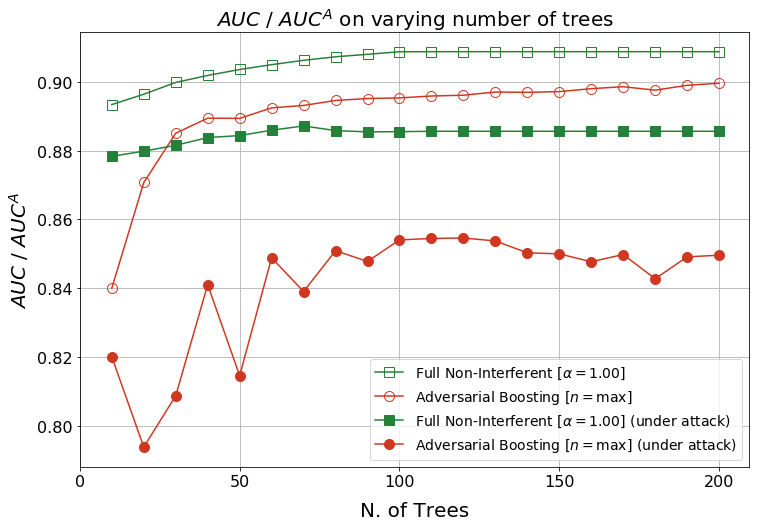

In [21]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.50]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.10]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10,  label="Weighted-Non-Interferent [alpha=0.50] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D',  ms=10,  label="Weighted-Non-Interferent [alpha=0.10] (under attack)")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$] (under attack)")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC$ / $AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC$ / $AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees.pdf")

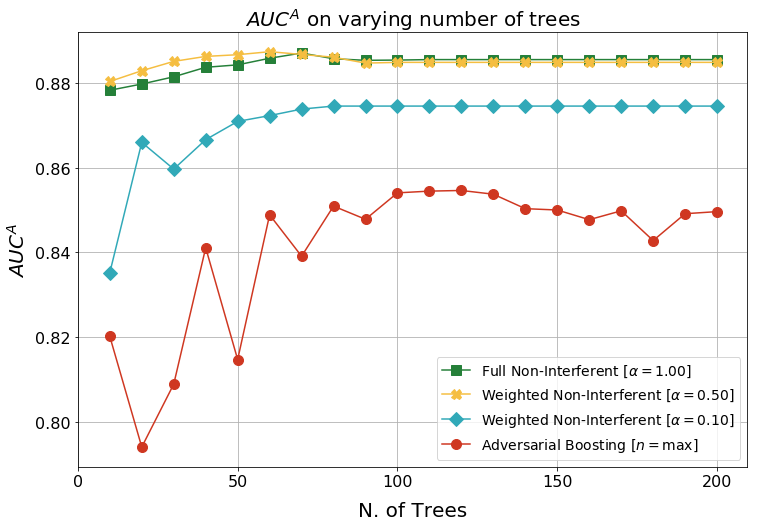

In [24]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
#          color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#f5be41', marker='X', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.50$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#31a9b8', marker='D', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.10$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         color='#f5be41', marker='X', ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.50$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         color='#31a9b8', marker='D',  ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.10$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$]")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees_alpha.pdf")
#plt.savefig("unattacked_roc_auc_trees_alpha.pdf")

# Table 1

In [ ]:
def clean_df (eval_df):

    eval_df.rename(columns={
    "Roc Auc": "ROC AUC", 
    "Roc Auc Uma": "ROC AUC Under Max Attack",
    "Log Loss Uma": "Log Loss Under Max Attack",
    "Binary Err Rate Uma": "Binary Err Rate Under Max Attack"
    }, inplace=True)
    
    eval_df = eval_df[(eval_df['Model']=="Standard") |
                      (eval_df['Model']=="Baseline [p=1.0; n=max]") |
                      (eval_df['Model']=="Baseline [p=1.0; n=1]") |
                      (eval_df['Model']=="SVM [C=0.1]") |
                      (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]") |
                      (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]") |
                      (eval_df['Model']=="Full-Non-Interferent")
                      ]

    eval_df = eval_df[(eval_df['N. of Trees']==0) | (eval_df['Model'] == 'SVM [C=0.1]')]

    eval_df["e-ROC"] = eval_df["ROC AUC"] - eval_df["ROC AUC Under Max Attack"] 
    eval_df["e-LogLoss"] = - eval_df["Log Loss"] + eval_df["Log Loss Under Max Attack"] 
    
    return eval_df

weak_df = clean_df( pd.read_csv("../plots/weak.csv", sep=",") )
display(weak_df)

strong_df = clean_df( pd.read_csv("../plots/strong.csv", sep=",") )
display(strong_df)

In [ ]:
weak_df['Model'].unique()

In [ ]:
row_map = {"Standard":"GBDT", 
           "Baseline [p=1.0; n=1]":"Adv. Boosting [n=1]", 
           "Baseline [p=1.0; n=max]":"Adv. Boosting [n=max]", 
           "SVM [C=0.1]": "SVM",
           "Weighted-Non-Interferent [alpha=0.10]": "Weighted-Non-Interferent [alpha=0.10]",
           "Weighted-Non-Interferent [alpha=0.50]": "Weighted-Non-Interferent [alpha=0.50]",
           "Full-Non-Interferent": "Full-Non-Interferent [alpha=1.00]"
          }


for row in list(row_map.keys()):
    print (row_map[row], end="\t")
    for col in ["Log Loss", "Log Loss Under Max Attack", "e-LogLoss"]:
        print ( " & %.3f" % weak_df[weak_df['Model']==row][col].values[0], end="") 
    for col in ["Log Loss", "Log Loss Under Max Attack", "e-LogLoss"]:
        print ( " & %.3f" % strong_df[strong_df['Model']==row][col].values[0], end="") 
    print (" \\\\")

for row in list(row_map.keys()):
    print (row_map[row], end="\t")
    for col in ["ROC AUC", "ROC AUC Under Max Attack", "e-ROC"]:
        print ( " & %.3f" % weak_df[weak_df['Model']==row][col].values[0], end="") 
    for col in ["ROC AUC", "ROC AUC Under Max Attack", "e-ROC"]:
        print ( " & %.3f" % strong_df[strong_df['Model']==row][col].values[0], end="") 
    print (" \\\\")
